In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
from sklearn.impute import SimpleImputer


import os
for dirname, _, filenames in os.walk('/content/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:

data = pd.read_csv("/content/train.csv", encoding="latin1")
data = data.fillna(method="ffill")
imputer = SimpleImputer(strategy='mean')  # Use mean, median, most_frequent, or constant
df_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


df_imputed.to_csv('imputed_file.csv', index=False)
data.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd

In [ ]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [ ]:
X_train = pd.read_csv('/content/imputed_file.csv').values[:,1:]

## Doing Min-Max Scaling to convert the image pixel values from 0 to 255 range to 0 to 1
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling

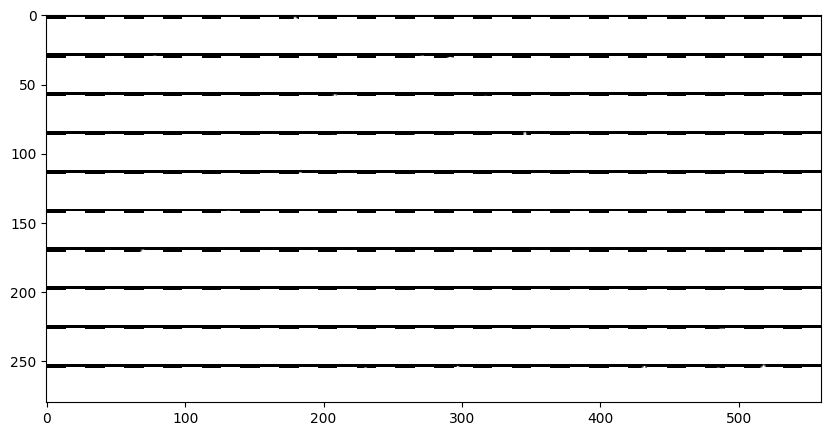

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train));

In [ ]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -144.10, time = 5.37s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -122.68, time = 4.48s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -111.98, time = 5.60s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -106.19, time = 4.59s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -101.46, time = 4.42s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -98.39, time = 5.85s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -98.20, time = 4.39s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -93.37, time = 4.89s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -92.60, time = 5.27s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -92.45, time = 6.58s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [ ]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])


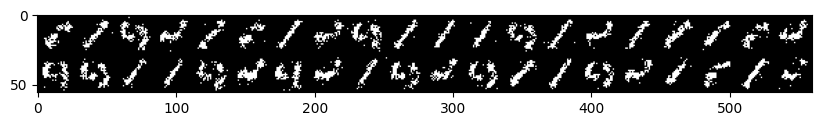

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

In [ ]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

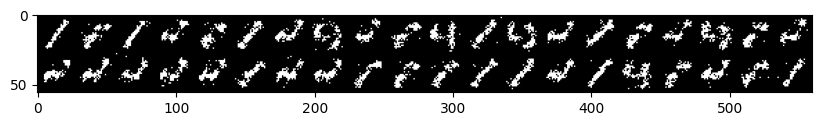

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

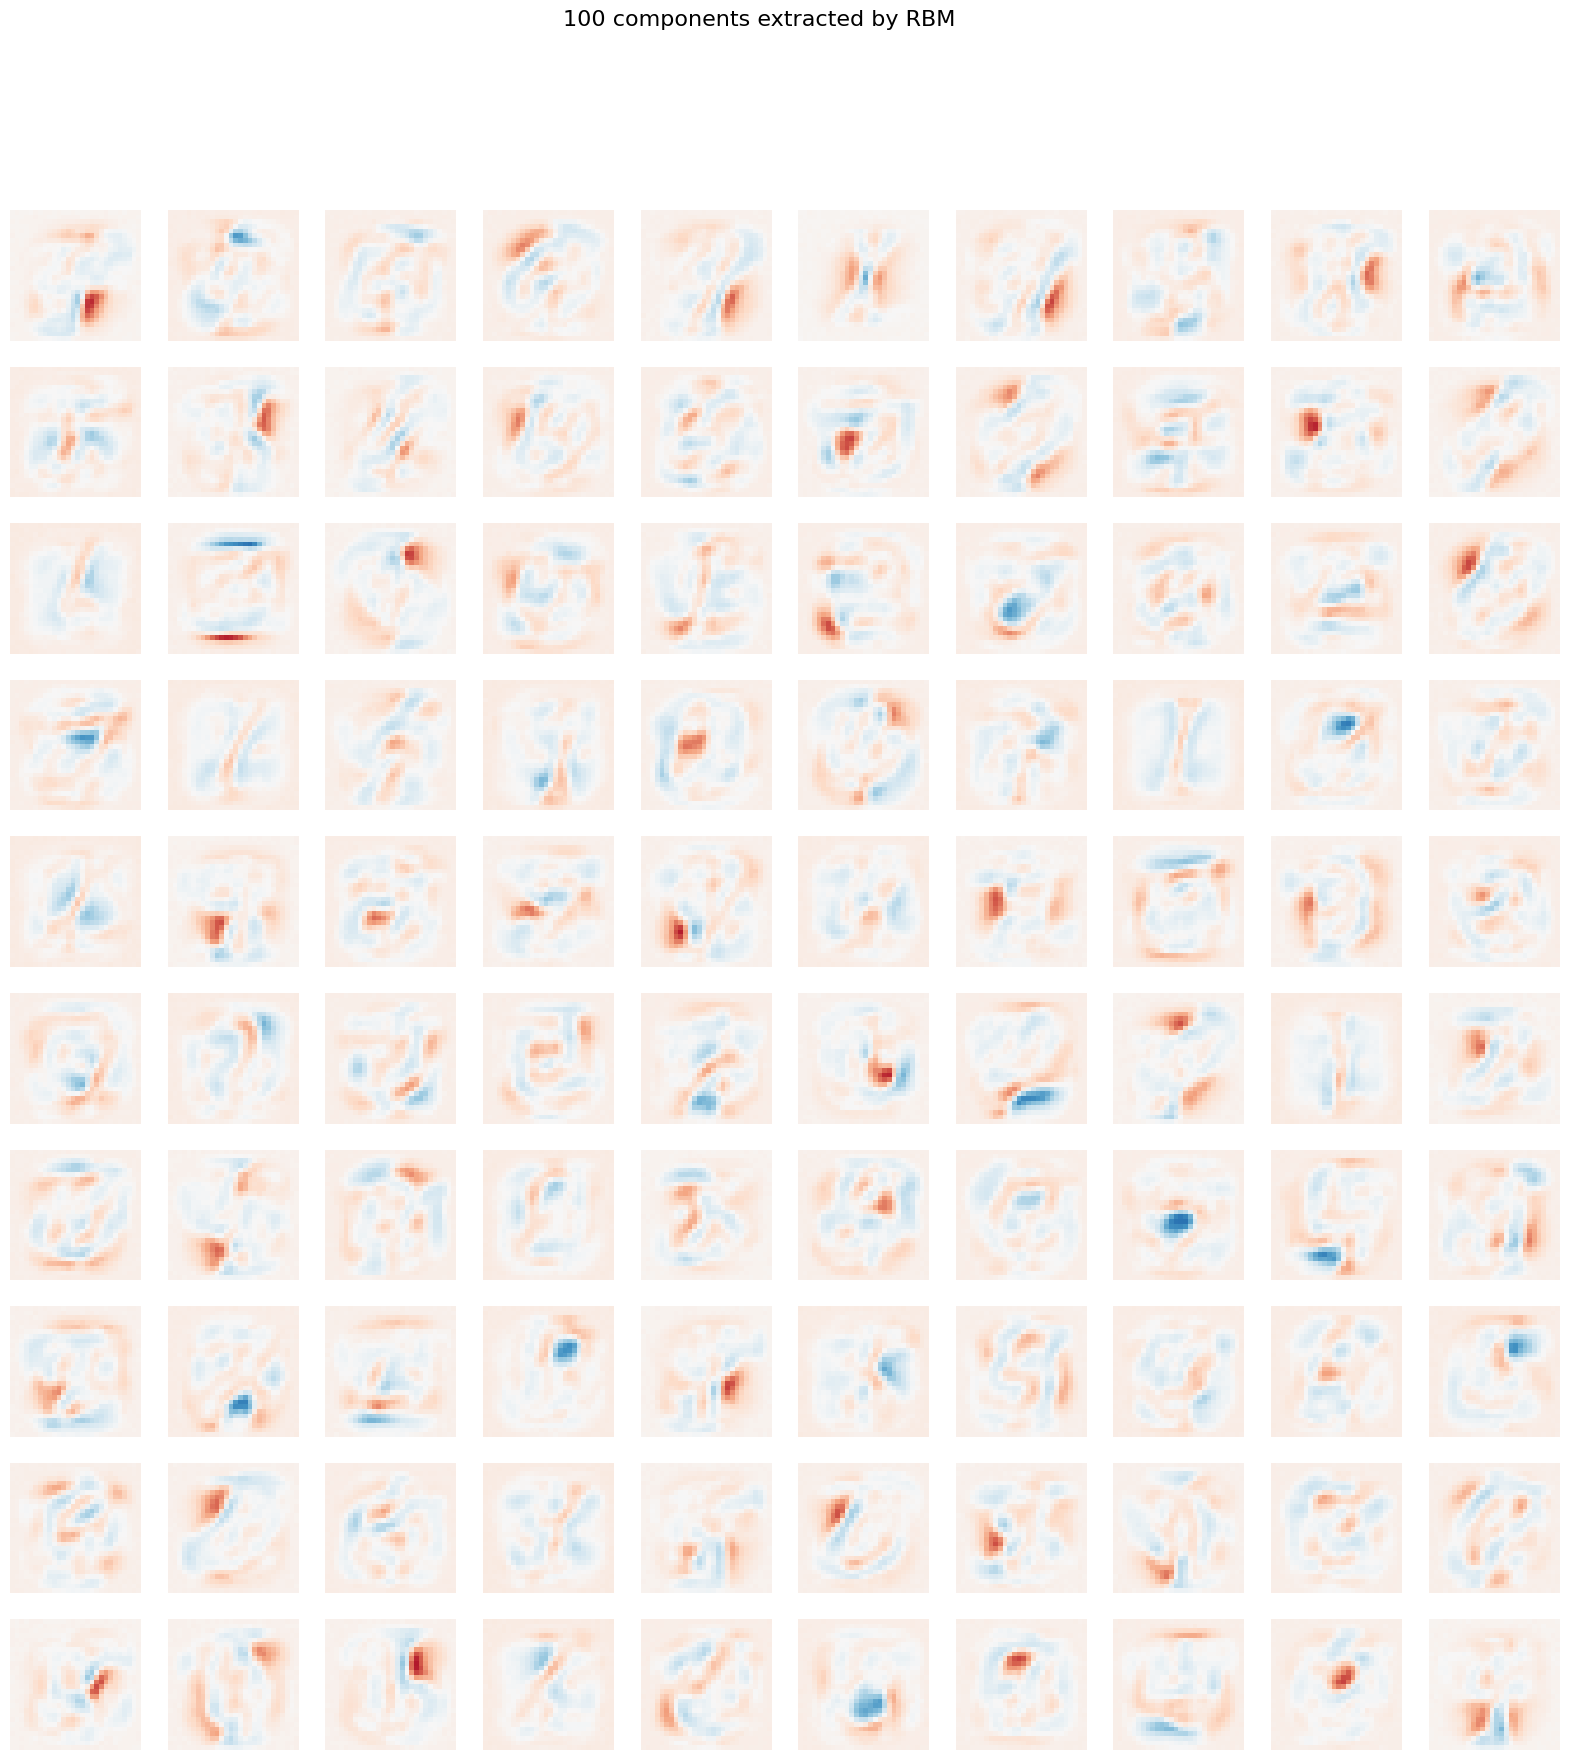

In [ ]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);